### Data Frame
- Pandas는 라벨이 붙어있는 2차원 배열(DataFrame)이나 1차원 배열(Series)을 다루는 도구
- 2차원 배열(DataFrame)의 행에 붙어 있는 라벨을 index(인덱스), 열에 붙어 있는 라벨을 column(컬럼)이라 부름
- 1차원 배열에는 행에만 라벨이 붙어 있고, 이를 index(인덱스)라고 부름
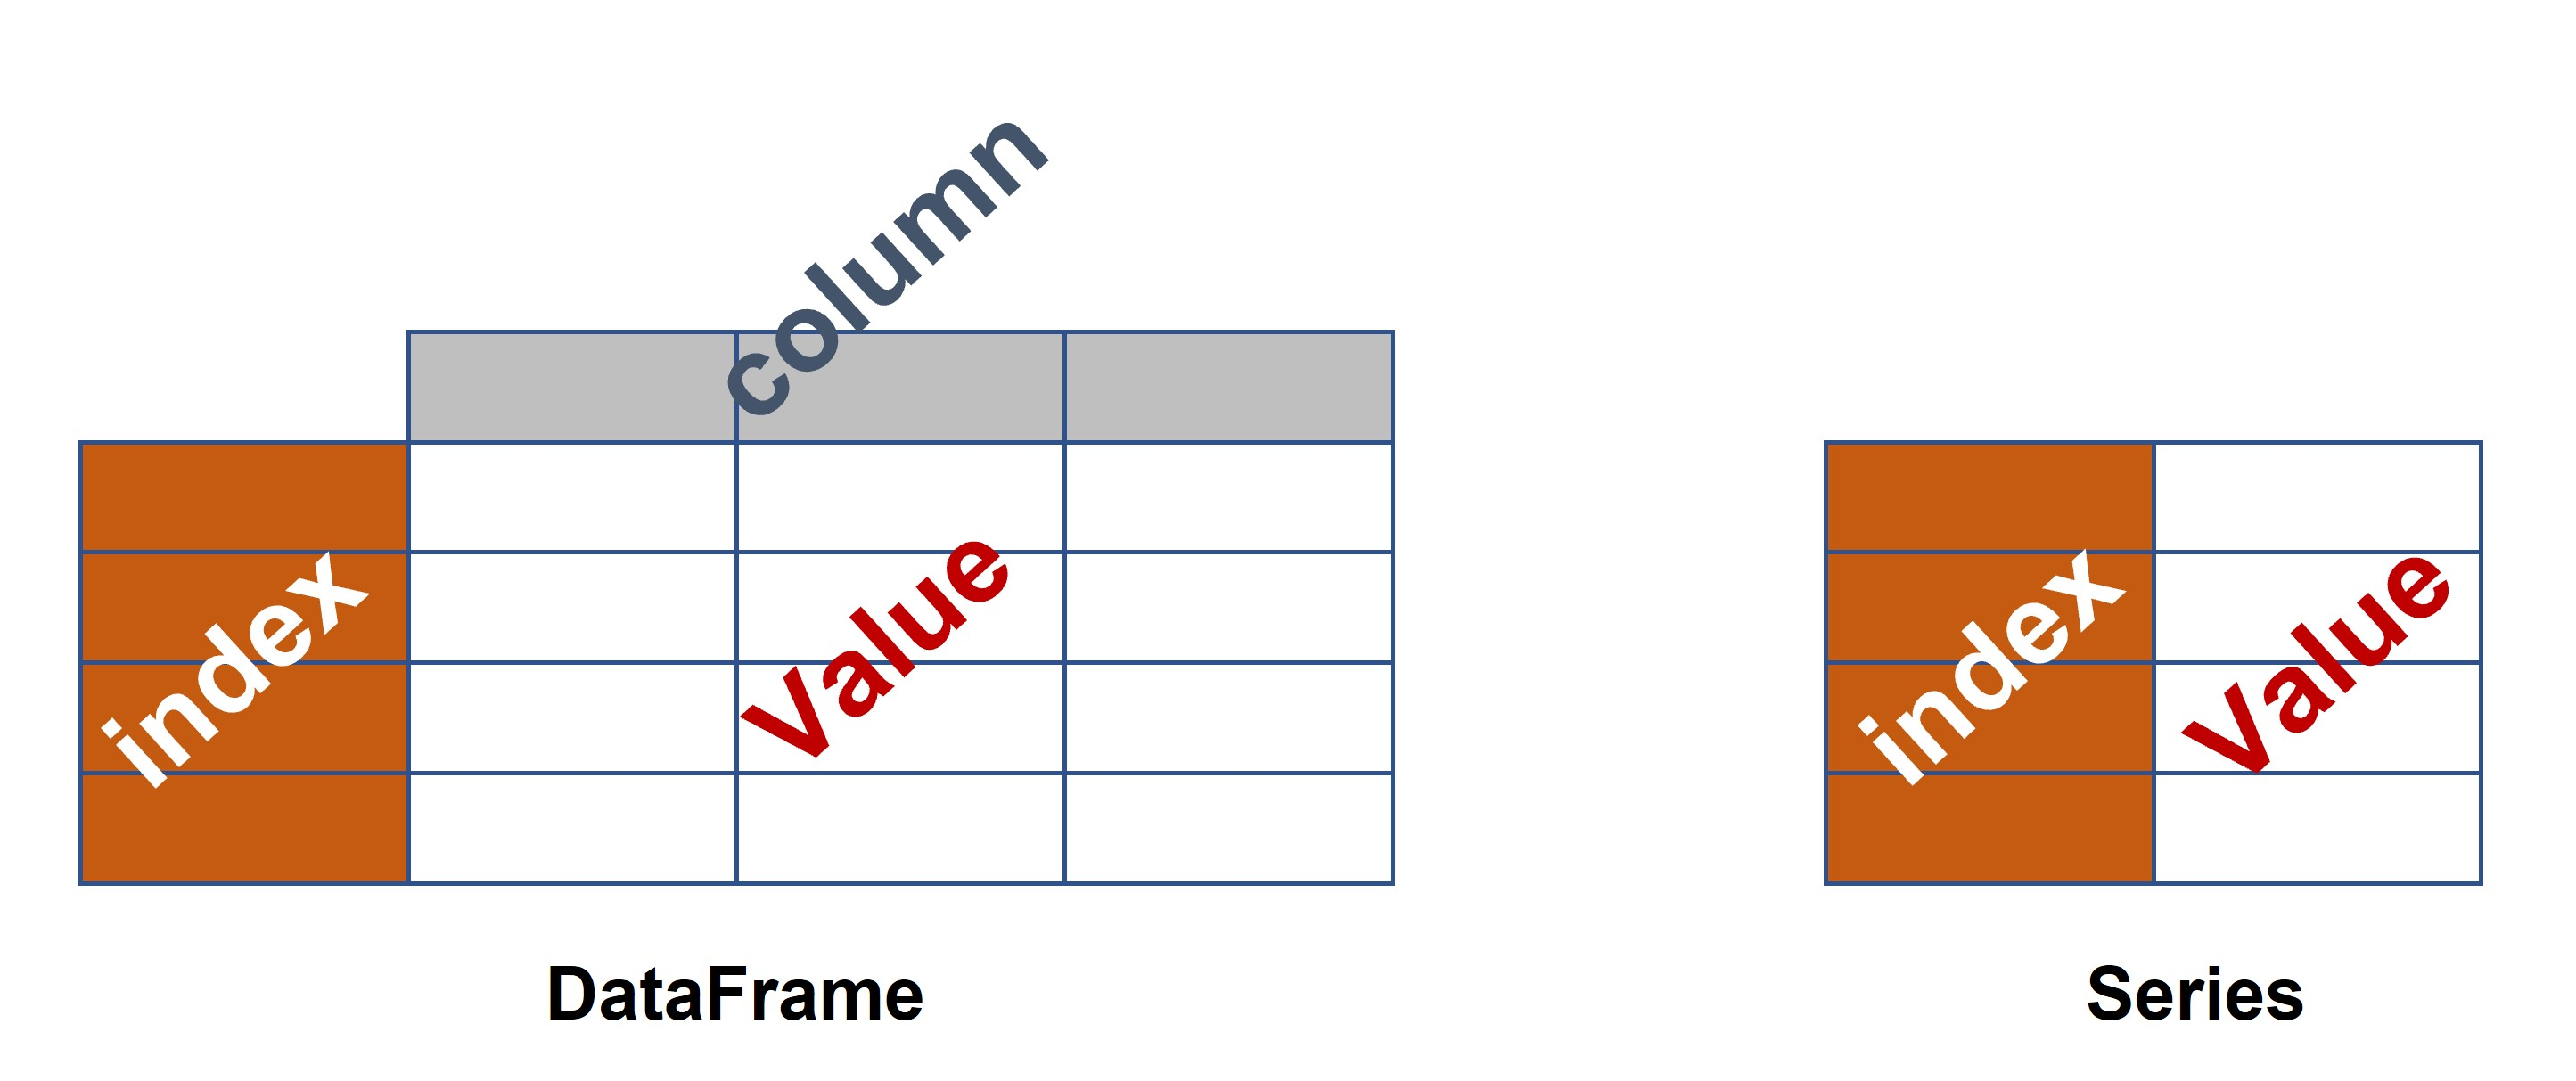

## Lab 1 : 시험 성적 데이터로 데이터 프레임 만들기
- import pandas : Pandas를 사용하기 위해서는 pandas 패키지를 로드해야 함
- 인덱스가 [0, 1, 2, 3]이고, 컬럼이 ['name', 'english', 'math']인 데이터 프레임을 생성해 봄
- 생성한 데이터 프레임의 이름은 df를 사용
- 데이터 프레임 생성시 [enter]로 줄바꿈 가능
- 별도로 인덱스를 지정하지 않으면 인덱스는 숫자 0부터 부여됨

In [2]:
import pandas as pd

In [8]:
df1 = pd.DataFrame({'name'    : ['김기훈', '이유진', '박동현', '김민지'],
                   'english' : [90, 80, 60, 70],
                   'math'    : [50, 60, 100, 20]})
df1

,name,english,math
0,김기훈,90,50
1,이유진,80,60
2,박동현,60,100
3,김민지,70,20


> 데이터 프레임으로 분석하기

In [22]:
df1.index

RangeIndex(start=0, stop=4, step=1)

In [19]:
df1.columns

Index(['name', 'english', 'math'], dtype='object')

In [30]:
# numpy의 array로 출력
df1.values

array([['김기훈', 90, 50],
       ['이유진', 80, 60],
       ['박동현', 60, 100],
       ['김민지', 70, 20]], dtype=object)

In [24]:
# 컬럼 추출 (시리즈)
s1 = df1['math']
s1

0     50
1     60
2    100
3     20
Name: math, dtype: int64

In [9]:
sum(df1['english'])

300

In [10]:
df1['math'].sum()

230

In [11]:
sum(df1['english'])/4

75.0

In [14]:
df1['math'].sum()/4

57.5

In [16]:
df1['math'].mean()

57.5

In [35]:
df1[ ['english', 'math'] ]

,english,math
0,90,50
1,80,60
2,60,100
3,70,20


In [56]:
# numpy array
df1[['english', 'math']].values > 70

array([[ True, False],
       [ True, False],
       [False,  True],
       [False, False]])

In [57]:
em = df1[['english', 'math']].values > 70
pd_em = pd.DataFrame(em, columns=['english', 'math'])
pd_em

,english,math
0,True,False
1,True,False
2,False,True
3,False,False


In [55]:
pd_em.sum()

english    2
math       1
dtype: int64

## Lab 2 : 데이터 프레임 만들기
- 이름을 index로 만들기

In [13]:
df2 = pd.DataFrame([[90, 50], [80, 60], [60, 100], [70, 20]],
                    columns = ['english', 'math'],
                    index   = ['김기훈', '이유진', '박동현', '김민지'])
df2

,english,math
김기훈,90,50
이유진,80,60
박동현,60,100
김민지,70,20


In [25]:
df2.index

Index(['김기훈', '이유진', '박동현', '김민지'], dtype='object')

In [26]:
df2.columns

Index(['english', 'math'], dtype='object')

In [38]:
df2.values

array([[ 90,  50],
       [ 80,  60],
       [ 60, 100],
       [ 70,  20]], dtype=int64)

In [37]:
df2['math'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 김기훈     50
이유진     60
박동현    100
김민지     20
Name: math, dtype: int64>

In [58]:
df2 > 50

,english,math
김기훈,True,False
이유진,True,True
박동현,True,True
김민지,True,False


In [60]:
# True : 1, False : 0
(df2 > 50).sum()

english    4
math       2
dtype: int64

##  Lab 3 교재 84 문제 풀이
### 실습 1 : df1
- 교재 84쪽의 표를 이용하여 데이터 프레임 df1을 만들어 출력해 보세요
- df1의 인덱스, 컬럼, value 값을 추출하여 출력해 보세요
- 만든 데이터 프레임을 이용하여 과일의 평균 가격과 판매량의 평균을 구하시오

### 실습 2 : df2
- 교재 84쪽의 표를 이용하여 데이터 프레임 df2를 만들어 출력해 보세요
- df2의 인덱스, 컬럼, value 값을 추출하여 출력해 보세요
- 만든 데이터 프레임을 이용하여 과일의 평균 가격과 판매량의 평균을 구하시오
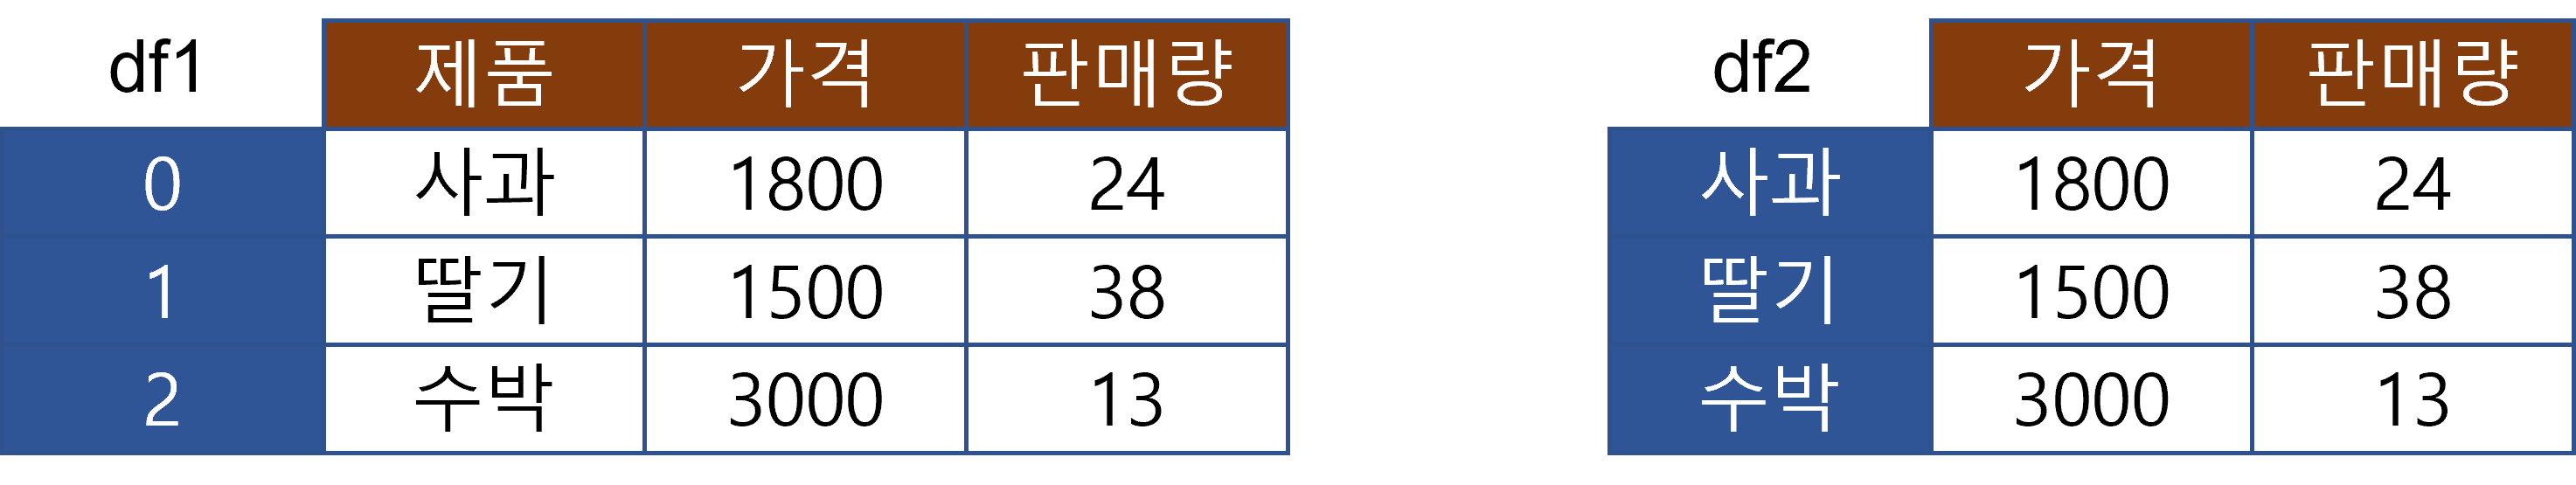

## Lab 4 : 외부 데이터 이용하기
- 분석할 데이터를 엑셀 데이터에서 가져 오기 (https://bit.ly/doit_python)
- pd.read_excel('excel_exam.xlsx')
- 첫번째 행을 컬럼으로 지정하고, 인덱스는 0부터 할당됨
- 특정 컬럼을 인덱스로 만들기 위해서는 set_index() 함수 사용

In [3]:
df_exam = pd.read_excel('excel_exam.xlsx')

In [5]:
df_exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [6]:
df_exam = pd.read_excel('excel_exam.xlsx').set_index('id')

In [8]:
df_exam.head()

,nclass,math,english,science
id,,,,
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65


> 데이터 분석하기

In [9]:
df_exam['math'].sum()

1149

In [13]:
len(df_exam)

20

In [14]:
df_exam.sum()

nclass       60
math       1149
english    1698
science    1189
dtype: int64

In [15]:
df_exam.mean()

nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

## Lab 5 엑셀의 첫번째 행이 변수명(컬럼 이름)이 아닌 경우
- 첫번째 행의 데이터를 컬럼 이름으로 인식함
- Lab4에서 사용한 엑셀 파일에서 첫 행을 삭제하여 실습에 사용

In [31]:
pd_excel_exam_novar = pd.read_excel('excel_exam_novar.xlsx')

In [32]:
pd_excel_exam_novar.head()

,1,1.1,50,98,50.1
0,2,1,60,97,60.0
1,3,1,45,86,78.0
2,4,1,30,98,58.0
3,5,2,25,80,65.0
4,6,2,50,89,98.0


In [33]:
pd_excel_exam_novar = pd.read_excel('excel_exam_novar.xlsx', header = None)
pd_excel_exam_novar.head()

,0,1,2,3,4
0,1,1,50,98,50.0
1,2,1,60,97,60.0
2,3,1,45,86,78.0
3,4,1,30,98,58.0
4,5,2,25,80,65.0


In [34]:
pd_excel_exam_novar.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [35]:
pd_excel_exam_novar.columns = ['id', 'nclass', 'math', 'english', 'science']

In [36]:
pd_excel_exam_novar.head()

,id,nclass,math,english,science
0,1,1,50,98,50.0
1,2,1,60,97,60.0
2,3,1,45,86,78.0
3,4,1,30,98,58.0
4,5,2,25,80,65.0


In [37]:
pd_excel_exam_novar.set_index('id')

,nclass,math,english,science
id,,,,
1,1,50,98,50.0
2,1,60,97,60.0
3,1,45,86,78.0
4,1,30,98,58.0
5,2,25,80,65.0
6,2,50,89,98.0
7,2,80,90,45.0
2,90,78,25,NaN
9,3,20,98,15.0


## Lab 6 : CSV 파일 불러오기
- Lab 4에서 사용한 엑셀 파일을 csv 유형 파일로 저장
- csv 파일 : 값이 쉼표(,)로 구분되어 저장된 자료 형태

In [43]:
import pandas as pd
df_exam_csv  = pd.read_csv('excel_exam_csv.csv')

In [45]:
df_exam_csv.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
